In [8]:
# imports
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
##%matplotlib inline
from ipywidgets import *

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
# if cloning repo and running on jupyter, only need to run this cell
# load dataset using pickle

datapath = os.path.join(os.getcwd(), 'datasets', 'Monkey Datasets', 'co_feats20.pkl') # run this line if in jupyter/cloned repo
print(datapath)
# datapath = os.path.join(os.getcwd(),'Monkey_Datasets', 'co_feats32.pkl') # run this line if colab
#datapath = "datasets\Monkey Datasets"
with open(datapath, 'rb') as f:
	data = pickle.load(f)
# quick lil dataframe to make it visual
dfs = []
for key in data.keys():
	dfs.append(pd.DataFrame(data[key]))
dfs = pd.concat(dfs, axis=1, keys=data.keys())
# group center out movements and show average trajectory, as well as corresponding neural data?

c:\Files\UM\BMIHackathon\datasets\Monkey Datasets\co_feats20.pkl


In [9]:

reachpositions = np.unique(data['targetPosition'], axis=0)

print(reachpositions)
reachpositions_interested = np.vstack((reachpositions[2,:], reachpositions[6,:]))
reachpositions_interested = reachpositions
print(reachpositions_interested)

grouped = {'neural':[], 'behavior':[]}
for position in reachpositions_interested:

	#get all trials for this target positions
	trials = np.unique(data['trialNumber'][np.argwhere((data['targetPosition'] == position).all(axis=1))])
	lens = np.stack([np.sum(data['trialNumber'] == trial) for trial in trials])

	# we need to align our trials since they are usually different lengths.
	# There are better ways to do this (time warping, etc.), but here we'll just truncate to the shortest trial of the group
	behavior = np.zeros((len(lens), np.min(lens), 6))
	neural = np.zeros((len(lens), np.min(lens), 96))
	for i, trial in enumerate(trials):
		behavior[i,:,:] = data['behavior'][(data['trialNumber'] == trial)[:,0],:][0:np.min(lens),:]
		neural[i,:,:] = data['neural'][(data['trialNumber'] == trial)[:,0],:][0:np.min(lens),:]

	grouped['behavior'].append(behavior)
	grouped['neural'].append(neural)

[[0.2 0.2]
 [0.2 0.5]
 [0.2 0.8]
 [0.5 0.2]
 [0.5 0.5]
 [0.5 0.8]
 [0.8 0.2]
 [0.8 0.5]
 [0.8 0.8]]
[[0.2 0.2]
 [0.2 0.5]
 [0.2 0.8]
 [0.5 0.2]
 [0.5 0.5]
 [0.5 0.8]
 [0.8 0.2]
 [0.8 0.5]
 [0.8 0.8]]


In [10]:
print(grouped['neural'][1].shape)
neural_stacked_first = np.concatenate(grouped['neural'][0],axis = 0)
neural_stacked_second = np.concatenate(grouped['neural'][1],axis = 0)
print(neural_stacked_first.shape)
print(neural_stacked_second.shape)
first_end = neural_stacked_first.shape[0]
print(first_end)
neural_stacked = np.concatenate((neural_stacked_first,neural_stacked_second),axis=0)
print(neural_stacked.shape)

(112, 52, 96)
(4399, 96)
(5824, 96)
4399
(10223, 96)


c:\Files\UM\BMIHackathon\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(10223, 2)


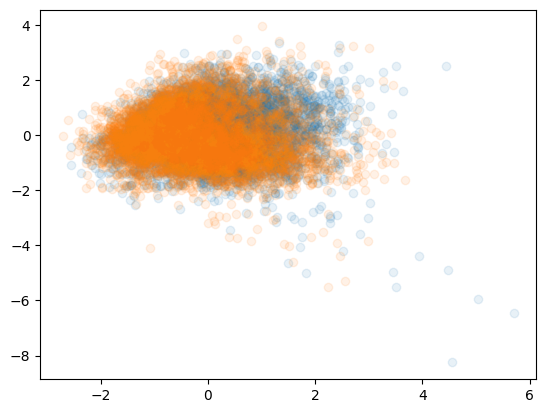

In [11]:
ica = FastICA(n_components=2)
input_ica = ica.fit_transform(neural_stacked)
print(input_ica.shape)
input_pca_first = input_ica[:first_end,:]
input_pca_second = input_ica[first_end:,:]
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
plt.scatter(input_pca_first[:,0],input_pca_first[:,1],alpha=0.1)
plt.scatter(input_pca_second[:,0],input_pca_second[:,1],alpha=0.1)
# ax.scatter(input_pca_first[:,0],input_pca_first[:,1],input_pca_first[:,2])
# ax.scatter(input_pca_second[:,0],input_pca_second[:,1],input_pca_second[:,2])


# Show plot
plt.show()


(array([0.00218321, 0.        , 0.00218321, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00218321, 0.        , 0.        , 0.00218321,
        0.        , 0.        , 0.00218321, 0.00218321, 0.00218321,
        0.00654964, 0.        , 0.00436643, 0.00218321, 0.        ,
        0.00218321, 0.00218321, 0.        , 0.00218321, 0.00218321,
        0.00436643, 0.00218321, 0.00436643, 0.00873285, 0.00218321,
        0.        , 0.        , 0.00218321, 0.00654964, 0.        ,
        0.00436643, 0.00873285, 0.01309928, 0.01964892, 0.02838177,
        0.0502139 , 0.05894675, 0.06549639, 0.09387816, 0.07859567,
        0.08732852, 0.133176  , 0.18993953, 0.23578701, 0.2510695 ,
        0.22268773, 0.27508484, 0.37551264, 0.31656589, 0.36677979,
        0.36677979, 0.42572654, 0.41044405, 0.47375723, 0.41044405,
        0.48249008, 0.38642871, 0.44319225, 0.42790976, 0.39952799,
        0.43664261, 0.33184838, 0.34494766, 0.32

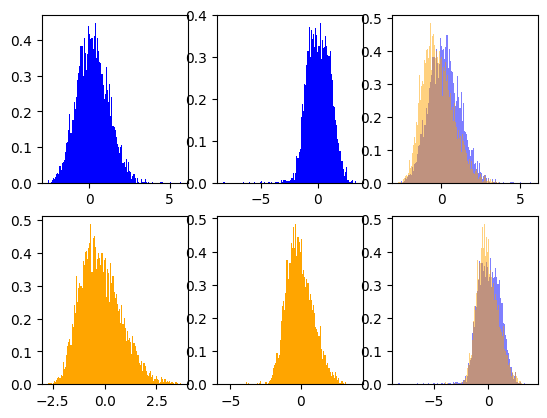

In [12]:

fig,ax  = plt.subplots(2,3)
ax[0,0].hist(input_pca_first[:,0], density=True, bins=120,color='Blue')
ax[1,0].hist(input_pca_second[:,0], density=True, bins=120,color='Orange')
ax[0,1].hist(input_pca_first[:,1], density=True, bins=120,color='Blue')
ax[1,1].hist(input_pca_second[:,1], density=True, bins=120,color='Orange')

ax[0,2].hist(input_pca_first[:,0], density=True, bins=120,color='Blue',alpha=0.5)
ax[0,2].hist(input_pca_second[:,0], density=True, bins=120,color='Orange',alpha=0.5)
ax[1,2].hist(input_pca_first[:,1], density=True, bins=120,color='Blue',alpha=0.5)
ax[1,2].hist(input_pca_second[:,1], density=True, bins=120,color='Orange',alpha=0.5)